# Associations with number of admissions

## Aims

Investigate whether there are associations between the number of admissions and different outcomes (e.g. thrombolysis rates, thrombolysis timings).

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Set max rows when display dataframe
pd.set_option('display.max_rows', 100)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    admission_only_filename = 'reformatted_data_admissions_only.csv'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path,
                                paths.data_filename))
data_full = pd.read_csv(os.path.join(paths.data_path,
                                     paths.admission_only_filename))

## Thrombolysis rates

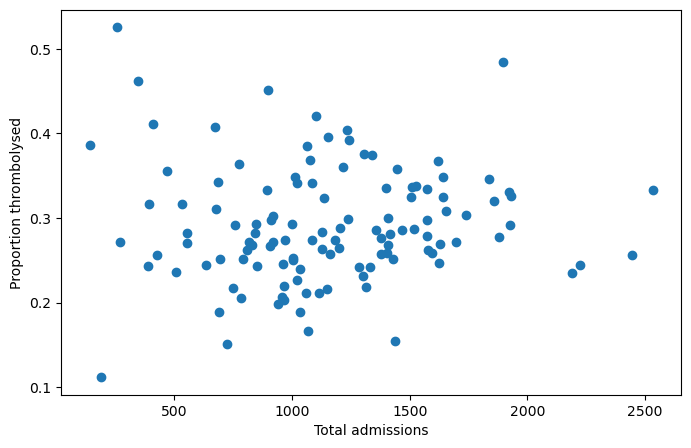

array([[1.        , 0.02751094],
       [0.02751094, 1.        ]])

In [4]:
# Find total number of admissions by team
admissions = data.groupby('stroke_team').size().rename('total_admissions')

# Find proportion thrombolysed by team
ivt = (data
       .groupby('stroke_team')['thrombolysis']
       .mean()
       .rename('proportion_thrombolysed'))

# Combine into one dataframe
admissions_ivt = pd.concat([admissions, ivt], axis=1)

# Create scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x=admissions_ivt['total_admissions'],
           y=admissions_ivt['proportion_thrombolysed'])
ax.set_xlabel('Total admissions')
ax.set_ylabel('Proportion thrombolysed')
plt.show()

np.corrcoef(admissions_ivt['total_admissions'],
            admissions_ivt['proportion_thrombolysed'])

Observations: There is not relationship between total admissions and thrombolysis rates.